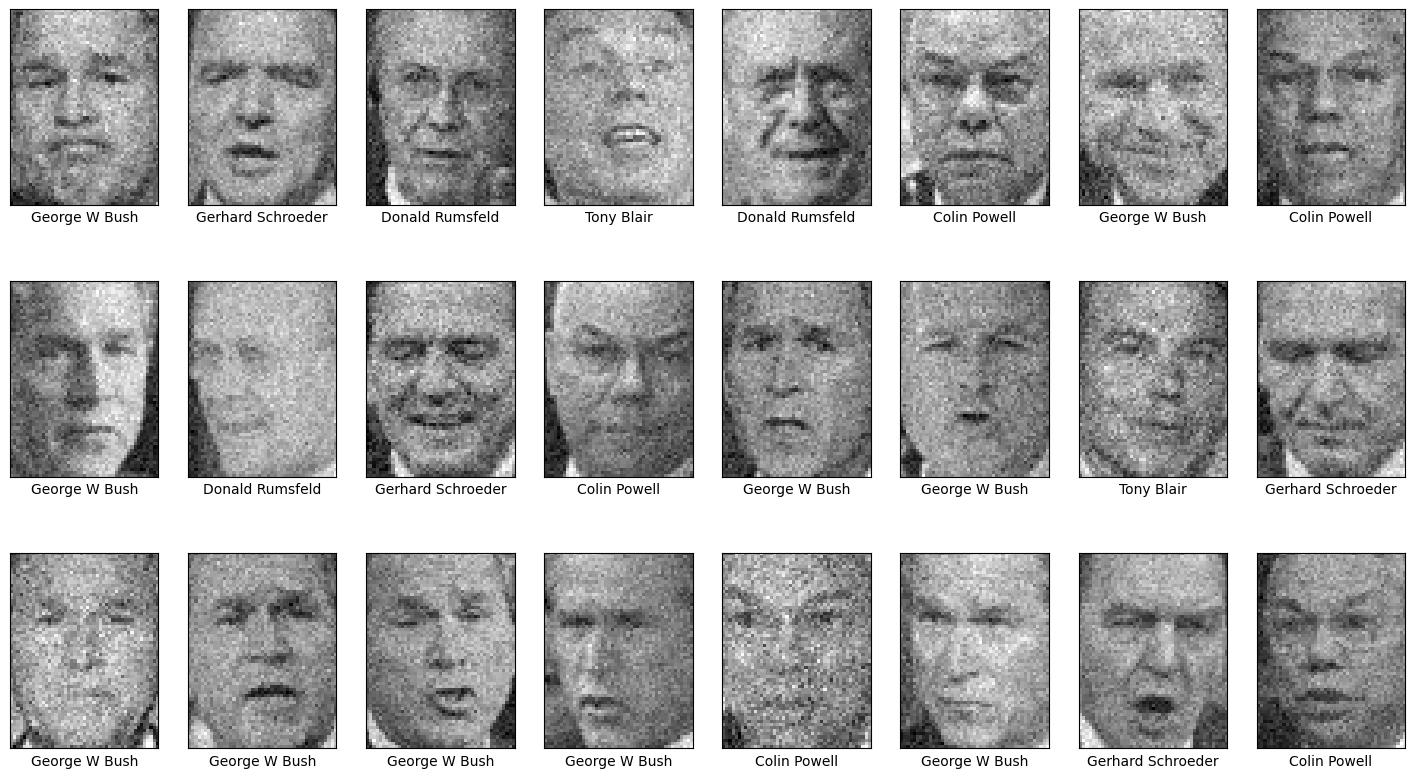

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
import numpy as np

faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] *
                                  faces.images.shape[2])
 
np.random.seed(0)
noisy_faces = np.random.normal(faces.data, 0.0765)

fig, ax = plt.subplots(3, 8, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(noisy_faces[i].reshape(62, 47), cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

Có rất nhiều nhiễu -> giảm nhiễu bằng PCA

In [2]:
from sklearn.decomposition import PCA

pca = PCA(0.8, random_state=0) # reduce 80% dataset's demensions
pca_faces = pca.fit_transform(noisy_faces)
pca.n_components_

np.int64(179)

Tái tạo lại số chiều y cũ sau khi thực hiện PCA

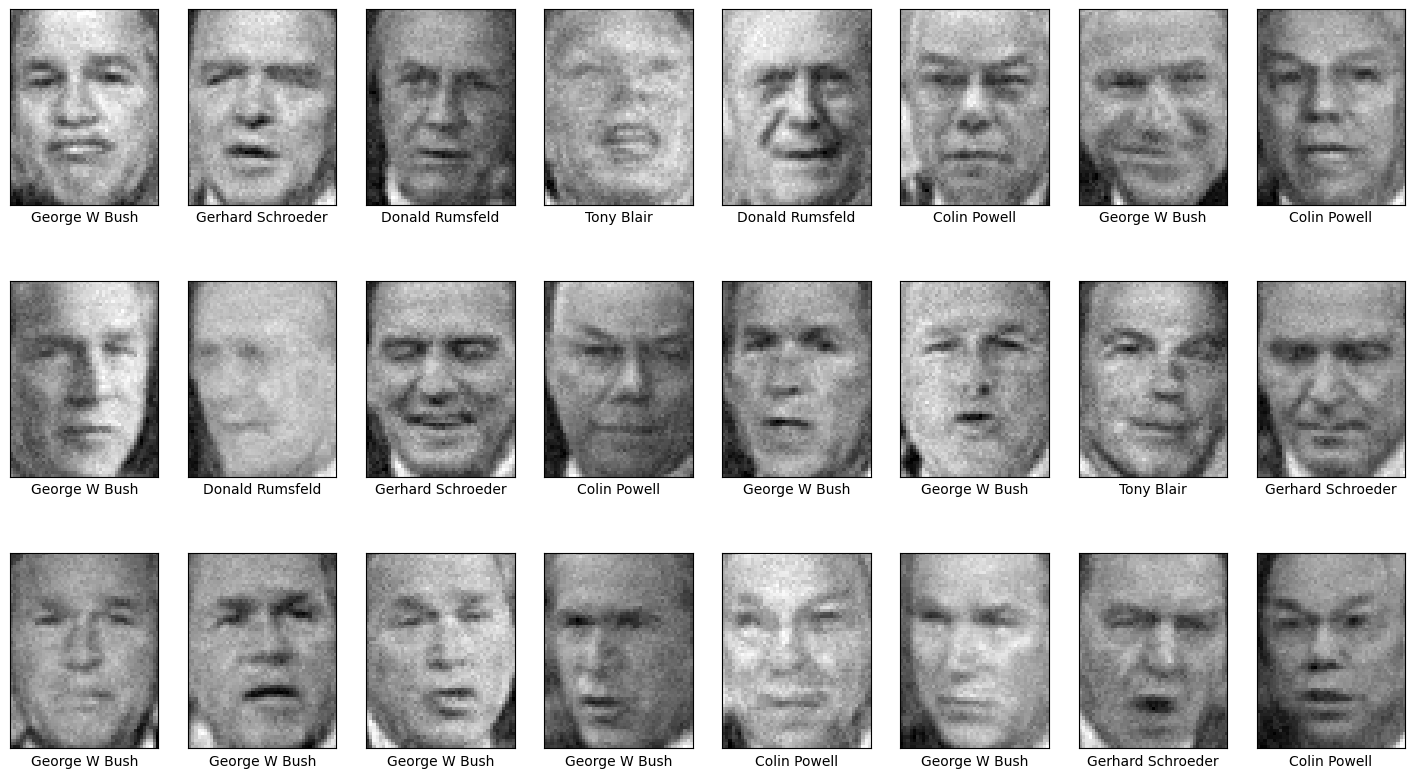

In [3]:
unpca_faces = pca.inverse_transform(pca_faces)

fig, ax = plt.subplots(3, 8, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i].reshape(62, 47), cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])